In [1]:
import sys
sys.path.append('..')
import dependencies
import soft_dependencies

Python Version 3.9.12 (main, Jun  1 2022, 06:36:29) 
[Clang 12.0.0 ]
Numpy Version 1.22.2
Scipy Version 1.7.3
Sklearn Version 1.0.2
Matplotlib Version 3.5.1
Pandas Version 1.4.2
Line Profiler Version 3.3.1
Memory Profiler Version 0.58.0


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import glob

In [3]:
from Scripts.nonparanormal_skeptic import nonparanormal_skeptic
from Scripts.anBiGLasso_cov import anBiGLasso
from Scripts.EiGLasso import EiGLasso_cov as EiGLasso
from Scripts.scBiGLasso import scBiGLasso_cov as scBiGLasso
from Scripts.utilities import binarize_matrix

In [4]:
np.set_printoptions(precision=3, suppress=True)
%load_ext line_profiler
%load_ext memory_profiler
%load_ext autoreload
%autoreload 2

# COIL Data
From the 'processed' dataset available here: https://cave.cs.columbia.edu/repository/COIL-20

We only look at the duck data.

In [ ]:
# Here we load the image, and optionally drop every `imsize_factor`th pixel
# if we want to minimize pixels.  In the BiGLasso paper, they considered 9 by 9
# We consider the 64x64 case
import glob
imsize_factor = 2
imsize = 128 // imsize_factor
files = sorted(glob.glob('../../Data/coil-20-proc/*.png'))
duck_mat = np.array(
    [np.array(Image.open(f))[::imsize_factor, ::imsize_factor].reshape(imsize**2) for f in files],
    dtype=np.int16
).reshape((20, 72, imsize**2))
duck_mat.shape # object, frame, flattened pixel
plt.imshow(duck_mat[10, 0].reshape(imsize, imsize))

In [53]:
T, S = nonparanormal_skeptic(duck_mat[10][np.newaxis, ::, ...]) 

In [275]:
Psi, Theta = scBiGLasso(100, 1e-6, T, S, beta_1 = 10, beta_2 = 0.5)

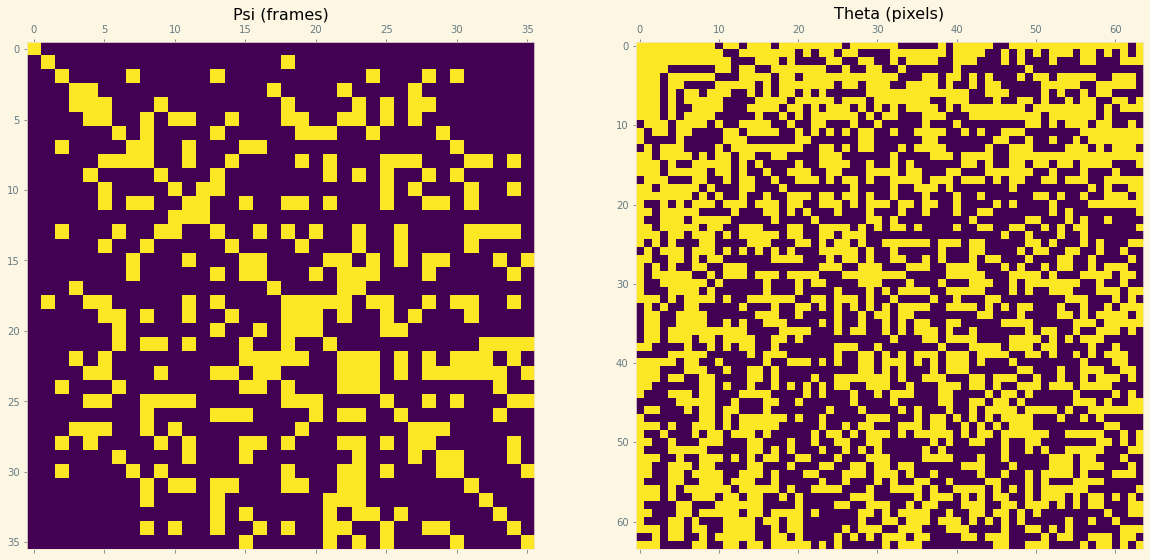

In [276]:
Psi_ = binarize_matrix(Psi, mode='Nonzero')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Nonzero')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (pixels)')
    
    # Add gridlines for pixel rows
    # We skip rows b/c otherwise it would be too cluttered
    #for i in range(16):
    #    ax2.axvline(64*i)
    #    ax2.axhline(64*i)

In [257]:
Psi, Theta = EiGLasso(T, S, beta_1 = 0.5, beta_2 = 0.8)

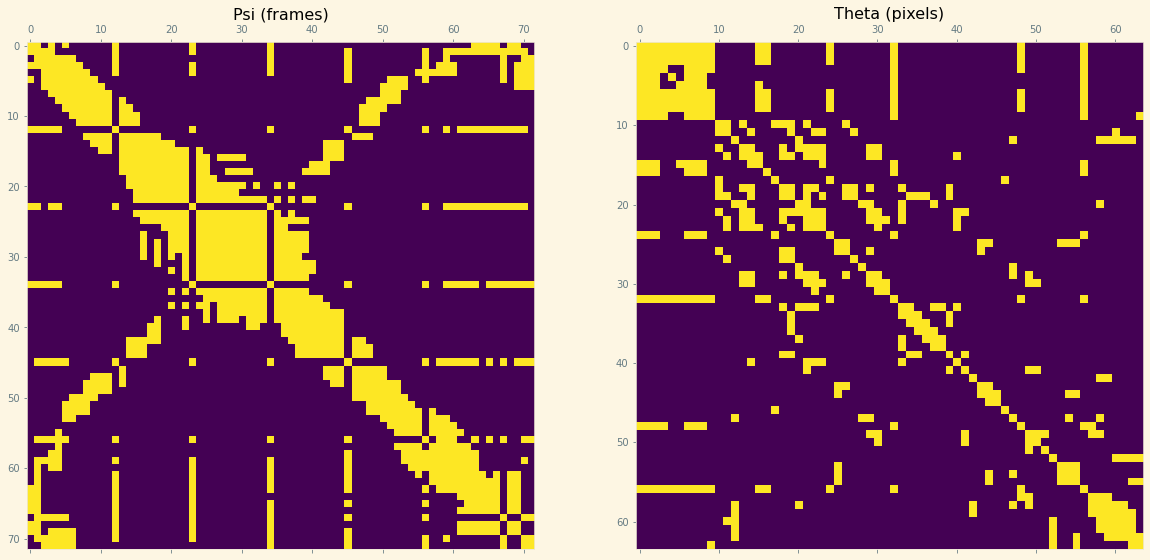

In [258]:
Psi_ = binarize_matrix(Psi, mode='Nonzero')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Nonzero')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (pixels)')
    
    # Add gridlines for pixel rows
    # We skip rows b/c otherwise it would be too cluttered
    #for i in range(16):
    #    ax2.axvline(64*i)
    #    ax2.axhline(64*i)

In [16]:
from Scripts.anBiGLasso import calculateEigenvalues, eigenvectors_MLE
from Scripts.anBiGLasso_cov import eigenvalues_MLE
# Runtime analysis
%lprun -f anBiGLasso -f calculateEigenvalues -f eigenvalues_MLE -f eigenvectors_MLE \
    anBiGLasso(T, S, beta_1 = 0.002, beta_2 = 0.002)

In [55]:
Psi, Theta = anBiGLasso(T, S, beta_1 = 0.1, beta_2 = 0.5, B_approx_iters = 10)
"""
from scipy.stats import norm
Psi, Theta = raw_anBiGLasso(
    duck_mat[10][np.newaxis, ...],
    beta_1 = 1e25,
    beta_2 = 0.002,
    B_approx_iters = 1000
)
print(Psi)
"""
print(Psi)

[[-0.252 -0.221  0.    ... -0.222  0.     0.   ]
 [-0.221 -0.313  0.    ... -0.011  0.     0.   ]
 [ 0.     0.    -0.083 ...  0.     0.    -0.404]
 ...
 [-0.222 -0.011  0.    ... -0.119  0.     0.   ]
 [ 0.     0.     0.    ...  0.    -0.07  -0.484]
 [ 0.     0.    -0.404 ...  0.    -0.484 -0.021]]


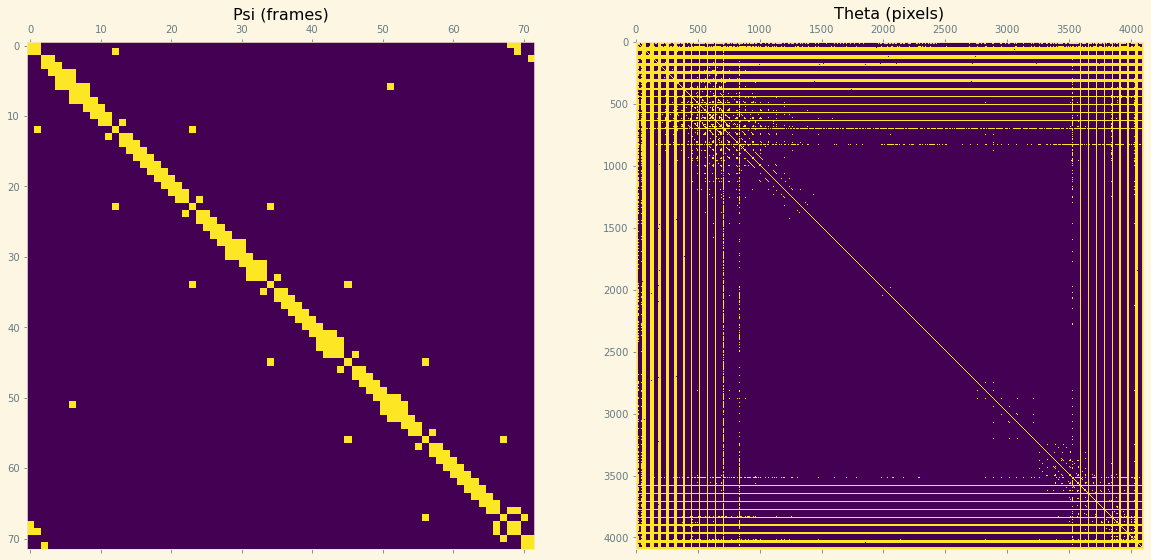

In [56]:
Psi_ = binarize_matrix(Psi, mode='Nonzero')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Nonzero')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (pixels)')
    
    # Add gridlines for pixel rows
    # We skip rows b/c otherwise it would be too cluttered
    #for i in range(16):
    #    ax2.axvline(64*i)
    #    ax2.axhline(64*i)
    #fig.savefig('../../Plots/Duck/anBiGLasso Performance.png')

In [59]:
from Scripts.nonparanormal_skeptic import nonparanormal_tensor_skeptic
T, S = nonparanormal_tensor_skeptic(duck_mat[10][np.newaxis, ::, ...]) 

In [66]:
Theta, Psi = anBiGLasso(T, S, beta_1 = 0.1, beta_2 = 0.1, B_approx_iters = 10)

print(Psi)

[[-2.127e+10 -2.210e-01  0.000e+00 ... -2.218e-01  0.000e+00  0.000e+00]
 [-2.210e-01 -2.127e+10  0.000e+00 ... -1.098e-02  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00 -2.127e+10 ...  0.000e+00  0.000e+00 -4.044e-01]
 ...
 [-2.218e-01 -1.098e-02  0.000e+00 ... -2.127e+10  0.000e+00  0.000e+00]
 [ 0.000e+00  0.000e+00  0.000e+00 ...  0.000e+00 -2.127e+10 -4.845e-01]
 [ 0.000e+00  0.000e+00 -4.044e-01 ...  0.000e+00 -4.845e-01 -2.127e+10]]


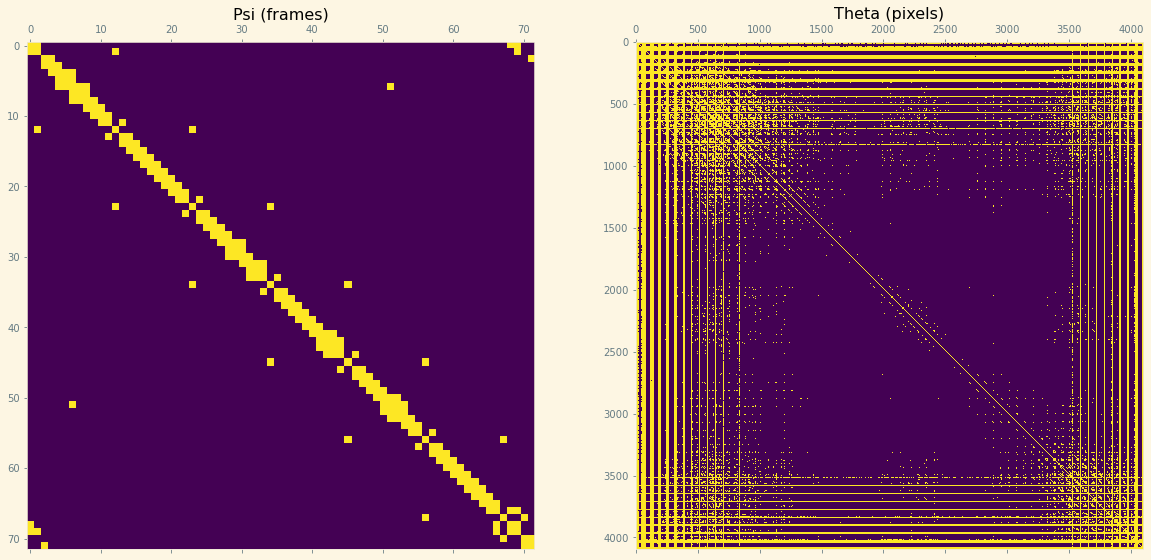

In [67]:
Psi_ = binarize_matrix(Psi, mode='Nonzero')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Nonzero')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (pixels)')
    
    # Add gridlines for pixel rows
    # We skip rows b/c otherwise it would be too cluttered
    #for i in range(16):
    #    ax2.axvline(64*i)
    #    ax2.axhline(64*i)
    #fig.savefig('../../Plots/Duck/anBiGLasso Performance.png')

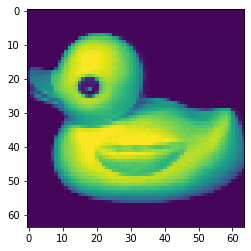

In [295]:
duck_mat_ = np.array(
    [np.array(Image.open(f))[::imsize_factor, ::imsize_factor].reshape(imsize**2) for f in files],
    dtype=np.int16
).reshape((20, 72, imsize, imsize))[10]
plt.imshow(duck_mat_[0])

In [37]:
from Scripts.anBiGLasso import anBiGLasso as raw_anBiGLasso
Psi, Theta = raw_anBiGLasso(
    duck_mat[10:11],
    beta_1 = 0.1,
    beta_2 = 0.2,
    B_approx_iters = 10
)

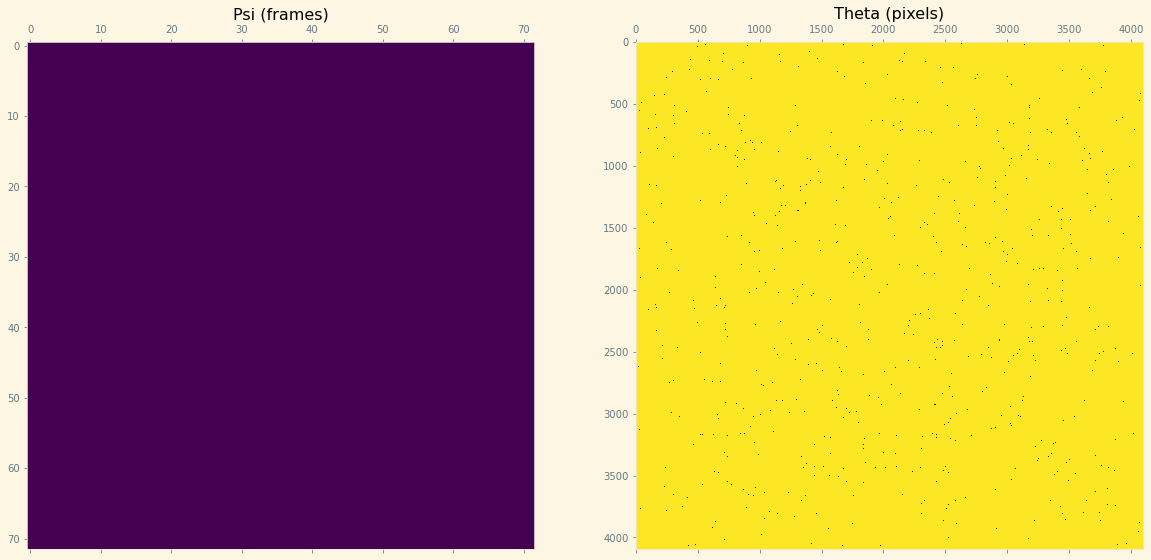

In [38]:
Psi_ = binarize_matrix(Psi, mode='Nonzero')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Nonzero')
np.fill_diagonal(Theta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(20, 10))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (pixels)')

# Tensor

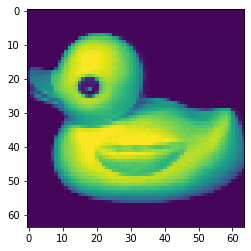

In [39]:
# Here we load the image, and optionally drop every `imsize_factor`th pixel
# if we want to minimize pixels.  In the BiGLasso paper, they considered 9 by 9
import glob
imsize_factor = 2
imsize = 128 // imsize_factor
files = sorted(glob.glob('../../Data/coil-20-proc/*.png'))
duck_tens = np.array(
    [np.array(Image.open(f))[::imsize_factor, ::imsize_factor].reshape(imsize**2) for f in files],
    dtype=np.int16
).reshape((20, 72, imsize, imsize))
duck_tens.shape # object, frame, flattened pixel
plt.imshow(duck_tens[10, 0])

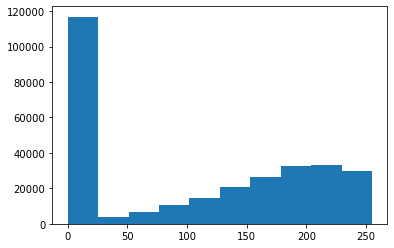

In [125]:
from Scripts.antGLasso import antGLasso
from Scripts.nonparanormal import nonparanormal
from scipy import stats

modified_counts = duck_tens[10:11, ...].copy().astype(np.float64)

mask = modified_counts < 10
#modified_counts[mask] = np.random.random(
#    size=modified_counts.shape
#)[mask]*256
#modified_counts = (modified_counts+modified_counts.mean()) / 2

#modified_counts[mask] = 257 + stats.norm(scale=50).rvs(size=len(modified_counts[mask]))
#modified_counts = 1 / (np.log(modified_counts+1)+1)

modified_counts[mask] = np.random.random(modified_counts.shape)[mask]

plt.hist(modified_counts.reshape(-1))
pass

In [126]:
Psi, Theta, Eta = antGLasso(
    modified_counts,
    sparsities=[5/70, 0.13, 0.13],
    B_approx_iters=1000
)

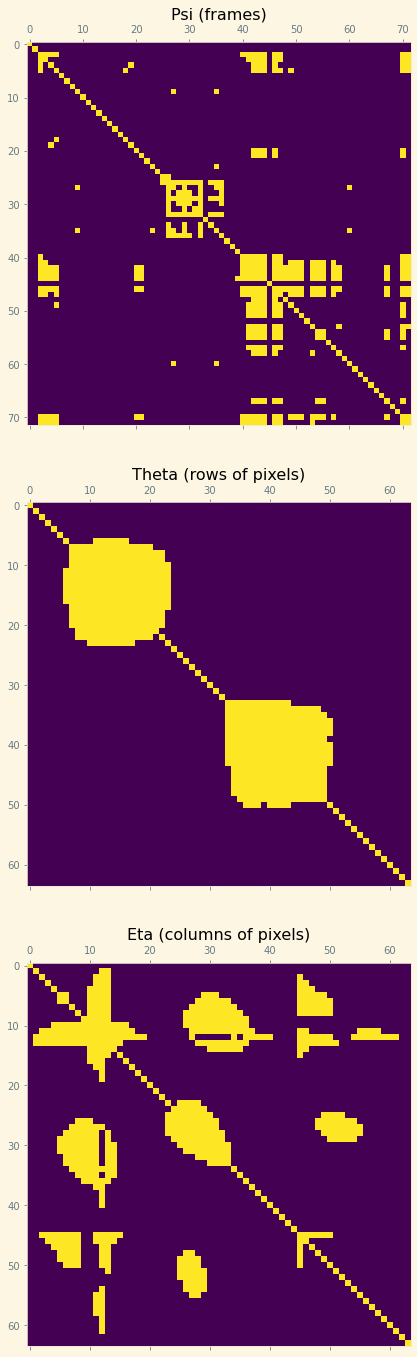

In [127]:
Psi_ = binarize_matrix(Psi, mode='Nonzero')
np.fill_diagonal(Psi_, 1)
Theta_ = binarize_matrix(Theta, mode='Nonzero')
np.fill_diagonal(Theta_, 1)
Eta_ = binarize_matrix(Eta, mode='Nonzero')
np.fill_diagonal(Eta_, 1)

with plt.style.context('Solarize_Light2'):
    fig, (ax1, ax2, ax3) = plt.subplots(nrows=3, figsize=(12, 24))
    
    ax1.grid(False)
    ax1.matshow(Psi_)
    ax1.set_title('Psi (frames)')
    
    ax2.matshow(Theta_)
    ax2.grid(False)
    ax2.set_title('Theta (rows of pixels)')
    
    ax3.matshow(Eta_)
    ax3.grid(False)
    ax3.set_title('Eta (columns of pixels)')
    
#fig.savefig('../../Plots/Final/antGLasso Duck Performance.png')
#fig.savefig('../../../../out_figs/strange_9.png')